## Riksantikvarieämbetet RAÄ - kulturarvsdata - UGC
version 1.3 

get UGC data [see API](http://ugc.kulturarvsdata.se/UGC-hub/api/documentation)
and understand how they link Europeana etc... 

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksantikvarie%C3%A4mbetet%20RA%C3%84%20UGC.ipynb)
* [blogpost](https://minancestry.blogspot.com/2020/06/check-status-kulturnav-raa.html)

In [5]:
# get all records UGC just sends 200 records --> we need to loop and I guess max3000000 records
import urllib3, json
import pandas as pd  
from tqdm.notebook import trange 
http = urllib3.PoolManager()
urlbase = "http://ugc.kulturarvsdata.se/UGC-hub/api?method=retrieve&scope=all&maxCount=40000&objectUri=all&format=json&selectFrom="
pd.set_option("display.max.columns", None) 
dftot = pd.DataFrame()
for i in trange(1,3000000,200):
    url = urlbase + str(i)
    r = http.request('GET', url)
    data = json.loads(r.data)
    dftot = dftot.append(pd.DataFrame(data["response"]["relations"]),sort=False)
print(dftot.head())
print(dftot.userName.unique())


KeyError: 'relations'

In [6]:
print(dftot.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2588030 entries, 0 to 29
Data columns (total 12 columns):
relationType       object
id                 int64
objectUri          object
userName           object
relatedUri         object
applicationName    object
createDate         object
updateDate         object
imageUrl           object
comment            object
tag                object
coordinateValue    object
dtypes: int64(1), object(11)
memory usage: 256.7+ MB
None


In [7]:
print(dftot.applicationName.unique())

['Kringla' 'Albin Larsson 1' 'Marcus Smith 1' 'Svensk runbibliografi']


In [8]:
dftot.relationType.unique()

array(['isVisualizedBy', 'sameAsWikipedia', 'sameAs', 'describes',
       'visualizes', 'isDescribedBy', 'isDescribedByWikipedia', 'hasPart',
       'isRelatedTo', 'isPartOf', nan, 'has_created'], dtype=object)

### UGC  
11 relationstyper jmf Wikidata > [7650 egenskaper](https://w.wiki/DYS) dvs. om målet är att "användare kan bidra själv med semantiska länkar" så känns det bättre om användaren gör det hos Wikidata där det finns stöd att även ange [semantiska länkar i bilderna](https://www.youtube.com/watch?v=lmWmMIuCJVM&t=158s) ?!?!? 

In [9]:
dftot["relationType"].value_counts()

sameAs                    2204256
isRelatedTo                216265
isVisualizedBy             135525
isDescribedBy               13465
sameAsWikipedia             12017
visualizes                   6125
isDescribedByWikipedia        193
hasPart                        98
isPartOf                       81
describes                       2
has_created                     1
Name: relationType, dtype: int64

In [10]:
plot = dftot["relationType"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# objekt med relatedUri borde finnas med Wikicommon objektet som sedan borde 
# peka tillbaka till K-samsök ? 
dftot.head(30)

In [ ]:
dftot.tail(30)

In [11]:
isCommon = dftot[dftot['relatedUri'].str.contains("commons.wikimedia.org", na=False)]
isCommon.head()

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,updateDate,imageUrl,comment,tag,coordinateValue
0,isVisualizedBy,35010720,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-24,NaN,NaN,NaN,NaN,NaN
1,isVisualizedBy,35010719,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-24,NaN,NaN,NaN,NaN,NaN
2,isVisualizedBy,35010718,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Kringla,2020-06-24,NaN,NaN,NaN,NaN,NaN
3,isVisualizedBy,35010717,http://kulturarvsdata.se/arme/object/AM140139,WikimediaC,http://commons.wikimedia.org/wiki/File:Bandvag...,Kringla,2020-06-24,NaN,NaN,NaN,NaN,NaN
4,isVisualizedBy,35010716,http://kulturarvsdata.se/arme/object/AM140139,WikimediaC,http://commons.wikimedia.org/wiki/File:Bandvag...,Kringla,2020-06-24,NaN,NaN,NaN,NaN,NaN


In [12]:
isCommon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216281 entries, 0 to 100
Data columns (total 12 columns):
relationType       216281 non-null object
id                 216281 non-null int64
objectUri          216281 non-null object
userName           216281 non-null object
relatedUri         216281 non-null object
applicationName    216281 non-null object
createDate         216281 non-null object
updateDate         7 non-null object
imageUrl           0 non-null object
comment            0 non-null object
tag                0 non-null object
coordinateValue    0 non-null object
dtypes: int64(1), object(11)
memory usage: 21.5+ MB


In [13]:
isCommon.relationType.unique()

array(['isVisualizedBy', 'sameAs', 'isRelatedTo'], dtype=object)

In [14]:
isCommon["relationType"].value_counts()

isVisualizedBy    134872
sameAs             81346
isRelatedTo           63
Name: relationType, dtype: int64

In [15]:
isCommon["userName"].value_counts() 

WikimediaC                  134350
Albin Larsson                81346
Bernt Fransson                 196
carwash                         90
Larissa                         52
Holger.Ellgaard                 49
Magnus Johansson                38
Adlitam                         27
Örjan Mattsson                  24
blajo                           19
Lasse Lundqvist                 11
Åsa Johansson                   10
Henrik Summanen                  9
DavidH                           7
jssfrk                           6
Jomal                            5
Eva Vedin                        5
Johan                            4
Dan Albert Koehl                 3
Tore Danielsson                  3
Magnus Sälgö                     3
kallep                           2
salgo60                          2
Hammarkind                       2
Allivet                          2
hamrelius                        2
David Haskiya                    2
Jan Ainali                       2
Wilhelm Lagercrantz 

In [16]:
isCommon.tail(100)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,updateDate,imageUrl,comment,tag,coordinateValue
17,isVisualizedBy,1669673,http://kulturarvsdata.se/raa/lamning/065f1628-...,Adlitam,https://commons.wikimedia.org/wiki/File:Skepps...,Kringla,2013-12-06,NaN,NaN,NaN,NaN,NaN
32,isVisualizedBy,1669655,http://kulturarvsdata.se/raa/lamning/7ea73cbb-...,Adlitam,https://commons.wikimedia.org/wiki/File:Algbac...,Kringla,2013-12-06,NaN,NaN,NaN,NaN,NaN
34,isVisualizedBy,1669653,http://kulturarvsdata.se/LSH/agents/9534,David Haskiya,http://commons.wikimedia.org/wiki/File:Gustave...,Kringla,2013-12-05,NaN,NaN,NaN,NaN,NaN
35,isVisualizedBy,1669652,http://kulturarvsdata.se/LSH/agents/9534,David Haskiya,http://commons.wikimedia.org/wiki/File:Gustav_...,Kringla,2013-12-05,NaN,NaN,NaN,NaN,NaN
67,isVisualizedBy,1498059,http://kulturarvsdata.se/raa/lamning/ac61481c-...,blajo,https://commons.wikimedia.org/wiki/File:Kvissl...,Kringla,2013-11-09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28,isVisualizedBy,112887,http://kulturarvsdata.se/raa/bbrp/21620000000042,Jomal,http://commons.wikimedia.org/wiki/File:Osvald_...,Kringla,2012-12-12,NaN,NaN,NaN,NaN,NaN
29,isVisualizedBy,112886,http://kulturarvsdata.se/raa/bbrp/21600000001859,Jomal,http://commons.wikimedia.org/wiki/File:Boberg_...,Kringla,2012-12-12,NaN,NaN,NaN,NaN,NaN
92,isVisualizedBy,94074,http://kulturarvsdata.se/raa/bbrp/21600000013187,Lasse Lundqvist,http://commons.wikimedia.org/wiki/File%3ANicod...,Kringla,2012-12-06,NaN,NaN,NaN,NaN,NaN
97,isVisualizedBy,19379,http://kulturarvsdata.se/raa/bbrp/21600000003542,Henrik Summanen,http://commons.wikimedia.org/wiki/File:Gunnar_...,Kringla,2012-11-12,NaN,NaN,NaN,NaN,NaN


## [Dataroundtrip Wikicommon <-> Kulturarvsdata](#dataroundtrip) 
se även tankar om [Digitaltmuseum dataroundtrip](https://minancestry.blogspot.com/2020/06/draft-kulturnav.html#Dataroundtrip) och [blogpost](https://minancestry.blogspot.com/2020/06/check-status-kulturnav-raa.html)

Skall dataroundtrip fungera behöver vi koppla ihop bilderna så att Wikicommons vet om kulturarvsdata och vice versa

id 1079458  

http://ugc.kulturarvsdata.se/UGC-hub/api?method=retrieve&objectUri=all&contentId=1079458&scope=single  
 
``` 
<response>
 <apiVersion>1.0</apiVersion>
 <relations>
  <relationType>isVisualizedBy</relationType>
  <relatedUri>https://commons.wikimedia.org/wiki/File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg</relatedUri>
  <tagValue/>
  <coordinateValue/>
  <commentValue/>
  <imageUrl/>
  <id>1079458</id>
  <uri>http://kulturarvsdata.se/raa/kmb/16000200045362</uri>
  <userName>blajo</userName>
  <applicationName>Kringla</applicationName>
  <createDate>2013-09-14</createDate>
  <updateDate/>
 </relations>
</response> 
```
-->   [File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg](https://commons.wikimedia.org/wiki/File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg)  
1. används i Wikidata [Q30313619](https://www.wikidata.org/wiki/Q30313619)
1. Wikicommon [M723463](https://commons.wikimedia.org/wiki/Special:EntityData/M723463.json) 
```
{
   entities: {
   M723463: {
   pageid: 723463,
   ns: 6,
   title: "File:Skeppshamns kapell, Tyndero 2006-02-27.jpg",
   lastrevid: 427376612,
   modified: "2020-06-18T20:24:28Z",
   type: "mediainfo",
   id: "M723463",
   labels: { },
   descriptions: { },
   statements: {
      P180: [
          {
             mainsnak: {
                snaktype: "value",
                property: "P180",
                datavalue: {
                   value: {
                      entity-type: "item",
                      numeric-id: 30313619,
                      id: "Q30313619"
                   },
                   type: "wikibase-entityid"
                }
              },
              type: "statement",
              id: "M723463$C3F19032-D57A-4208-B967-0F4C0C8D9E3D",
              rank: "normal"
           }
        ]
     }
    }
  }
}
``` 

### Wikicommons bilden bör peka tillbaka till K-samsök URI  
K-samsök URI = [Wikidata Property 1260](https://www.wikidata.org/wiki/Property:P1260) 

==> **Ny Wikicommon** [M723463](https://commons.wikimedia.org/wiki/Special:EntityData/M723463.json) med länk ** [raa/kmb/16000200045362](http://kulturarvsdata.se/raa/kmb/16000200045362) ** 

```  
{
   entities: {
   M723463: {
   pageid: 723463,
   ns: 6,
   title: "File:Skeppshamns kapell, Tyndero 2006-02-27.jpg",
   lastrevid: 427376612,
   modified: "2020-06-18T20:24:28Z",
   type: "mediainfo",
   id: "M723463",
   labels: { },
   descriptions: { },
   statements: {
      P180: [
          {
             mainsnak: {
                snaktype: "value",
                property: "P180",
                datavalue: {
                   value: {
                      entity-type: "item",
                      numeric-id: 30313619,
                      id: "Q30313619"
                   },
                   type: "wikibase-entityid"
                }
              },
              type: "statement",
              id: "M723463$C3F19032-D57A-4208-B967-0F4C0C8D9E3D",
              rank: "normal"
           }
       ]. 
       P1260: [
          {
             mainsnak: {
               snaktype: "value",
               property: "P1260",
               datavalue: {        
                   value: "raa/kmb/16000200045362",
                   type: "string"
                 }
              },
              type: "statement",
              id: "M723463$5369f899-4667-be9a-f9ba-40d8b90dabcc",
              rank: "normal"
              }
         ]
     }
    }
  }
}
``` 



## Listar unika användare som bidragit


In [17]:
print(dftot.userName.unique())

['WikimediaC' 'Wikipedia' 'Albin Larsson' 'carwash' 'Nixdorf' 'Boberger'
 'Holger.Ellgaard' 'salgo60' 'DavidH' 'Bernt Fransson' 'kallep' 'Larissa'
 'Lasse Lundqvist' 'HLP' 'babben' 'Allivet' 'demithor' 'Allvet'
 'Jan Ainali' 'Anders Lindeberg-Lindvet' 'Magnus Sälgö' 'andersthe'
 'Little Gun' 'kringelkrok' 'Magnus Johansson' 'Lennart T Olsson'
 'tompahvall' 'Tore Danielsson' 'hamrelius' 'Julie' 'Johan' 'nilsw'
 'David Haskiya' 'filosofiedoktor' 'kalle' 'Adlitam' 'Eva Vedin'
 'Hammarkind' 'Work with Sounds' 'jssfrk' 'blajo' 'Dan Albert Koehl'
 'Wilhelm Lagercrantz' 'Tester Testersson' 'Sendelbach' 'Johan Carlström'
 'Anders Wennersten' 'Örjan Mattsson' 'carin' 'Anders Olsson'
 'paulinadevries' 'anna söderström' 'Kalle Johansson' 'Sophie' 'henning'
 'helenabjork' 'Kaysara' 'ekstahagar' 'Åsa Johansson' 'magnussonp'
 'Kicki Ericson' 'LA2' 'Nils Weinander' 'Lotta' 'Per Rohdin'
 'Henrik Summanen' 'Jomal' 'Mikael Lindmark' 'LittleGun99' 'Mjohansson2']


In [18]:
usersActivity = dftot["userName"].value_counts() 
for i,v in dftot["userName"].value_counts().items():
    print(i,"\t",v)

Albin Larsson 	 2420261
WikimediaC 	 134350
carwash 	 20152
Wikipedia 	 11030
Jomal 	 604
Adlitam 	 338
Lasse Lundqvist 	 232
Bernt Fransson 	 196
Larissa 	 159
Magnus Johansson 	 100
Johan 	 93
Holger.Ellgaard 	 82
Eva Vedin 	 50
Allvet 	 40
blajo 	 30
jssfrk 	 27
Örjan Mattsson 	 24
DavidH 	 23
Jan Ainali 	 22
David Haskiya 	 18
Henrik Summanen 	 18
Åsa Johansson 	 16
Kicki Ericson 	 15
tompahvall 	 15
salgo60 	 11
nilsw 	 9
Nixdorf 	 9
HLP 	 9
Allivet 	 8
Anders Lindeberg-Lindvet 	 6
paulinadevries 	 5
Magnus Sälgö 	 5
andersthe 	 5
Mikael Lindmark 	 5
Tore Danielsson 	 4
Dan Albert Koehl 	 4
carin 	 3
Sendelbach 	 3
Little Gun 	 3
kalle 	 3
LA2 	 2
kringelkrok 	 2
kallep 	 2
helenabjork 	 2
Work with Sounds 	 2
Julie 	 2
Sophie 	 2
Johan Carlström 	 2
babben 	 2
Mjohansson2 	 2
hamrelius 	 2
Wilhelm Lagercrantz 	 2
Hammarkind 	 2
anna söderström 	 1
Anders Olsson 	 1
filosofiedoktor 	 1
Nils Weinander 	 1
Lotta 	 1
Per Rohdin 	 1
Kaysara 	 1
Anders Wennersten 	 1
Lennart T Olsson 	

In [19]:
percentage = dftot["userName"].value_counts(normalize=True) 


In [20]:
# Top 5 med procent andel --> 96 % gissar jag gjorts med program
percentage[:5]

Albin Larsson    0.935175
WikimediaC       0.051912
carwash          0.007787
Wikipedia        0.004262
Jomal            0.000233
Name: userName, dtype: float64

In [21]:
#Visa piechart 
plot = percentage.plot.pie(y='counts', figsize=(5, 5)) 
plt.show()

NameError: name 'plt' is not defined

In [22]:
# Visa top 15 
plot2 = percentage[:15].plot.bar(y='counts', figsize=(30, 5))  
plt.show()

NameError: name 'plt' is not defined

In [23]:
# Visa plats 6-40 
plot2 = percentage[5:40].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

NameError: name 'plt' is not defined

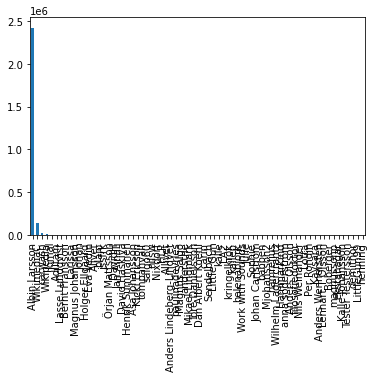

In [24]:
%matplotlib inline  
import matplotlib.pyplot as plt 
users = dftot["userName"].value_counts()

users.plot( kind = 'bar') 
plt.show()

In [25]:
dftot["createDate"].value_counts()

2018-11-28    1000004
2018-12-03     955563
2019-08-05     216202
2018-10-06     156895
2020-06-24     145380
               ...   
2014-12-05          1
2019-03-01          1
2019-05-06          1
2014-05-02          1
2014-10-31          1
Name: createDate, Length: 502, dtype: int64

In [28]:
dftot["createDate"].value_counts().sort_index(ascending=False)

2020-06-24    145380
2020-06-04      2708
2020-06-03      2773
2020-06-02        15
2020-05-14         1
               ...  
2012-02-09         1
2012-02-08         1
2012-02-07         1
2012-02-03         2
2012-02-02         2
Name: createDate, Length: 502, dtype: int64

In [29]:
# UGC äldsta värde är 2012-02-02 (samma år som WD skapades) och 
# mer än hälften av posterna skapades under en dag 2020-06-17 igår...?!?!?
dftot["createDate"].value_counts().sort_index()

2012-02-02         2
2012-02-03         2
2012-02-07         1
2012-02-08         1
2012-02-09         1
               ...  
2020-05-14         1
2020-06-02        15
2020-06-03      2773
2020-06-04      2708
2020-06-24    145380
Name: createDate, Length: 502, dtype: int64

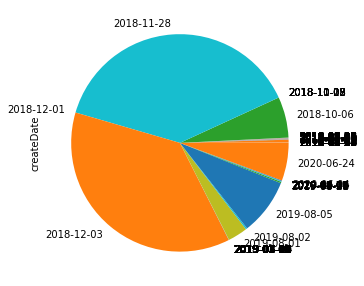

In [35]:
dfCreateDate = dftot["createDate"].value_counts().sort_index()
plotCreateDate = dfCreateDate.plot.pie(y='counts', figsize=(5, 5))  
plt.show()

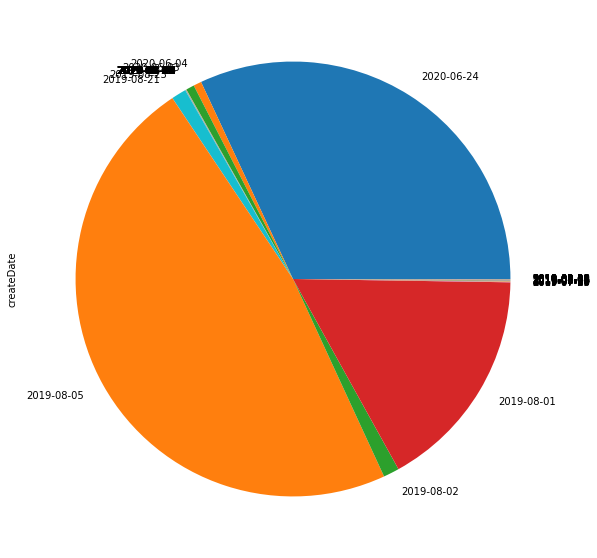

In [44]:
#Plot was hase been done the 100 latest  
plotCreateDate1 =   dfCreateDate.sort_index(ascending=False)[:100].plot.pie(y='counts', figsize=(10, 10))  
plt.show()

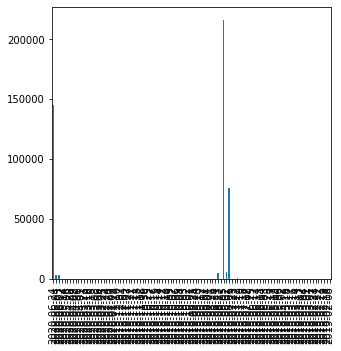

In [46]:
plotCreateDate1 =   dfCreateDate.sort_index(ascending=False)[:100].plot.bar(y='counts', figsize=(5, 5))  
plt.show()

In [47]:
dfCreateDate.sort_index(level=0) 

2012-02-02         2
2012-02-03         2
2012-02-07         1
2012-02-08         1
2012-02-09         1
               ...  
2020-05-14         1
2020-06-02        15
2020-06-03      2773
2020-06-04      2708
2020-06-24    145380
Name: createDate, Length: 502, dtype: int64

In [48]:
dfCreateDate.sort_index(level=0)

2012-02-02         2
2012-02-03         2
2012-02-07         1
2012-02-08         1
2012-02-09         1
               ...  
2020-05-14         1
2020-06-02        15
2020-06-03      2773
2020-06-04      2708
2020-06-24    145380
Name: createDate, Length: 502, dtype: int64

Plot piechart user

check links Europeana and if we have Linkeddata to agents ....

In [49]:
europeana = dftot['relatedUri'].str.contains("data.europeana.eu") 
europeana.describe()

count     2588028
unique          2
top          True
freq      1966045
Name: relatedUri, dtype: object

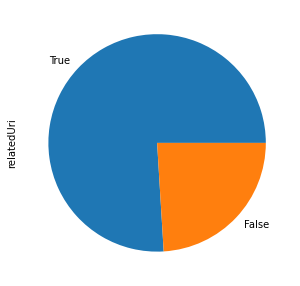

In [50]:
# 75 procent är länkar till Europeana dvs. troligen att samma objekt flyttats till Europeana 
# 
plotEuropeana = europeana.value_counts().plot.pie(y='counts', figsize=(5, 5))  

## Koll om det finns kopplingar länkad data dvs agent  
1966045 kopplingar verkar vara mellan objekt i kulturarvsdata till data.europeana.eu/item/  
Koppling Länkad data hittad dvs. samma som [Europeana Entity](https://www.wikidata.org/wiki/Property:P7704) samma som [Europeana Entity API](https://pro.europeana.eu/page/entity) verkar vara 46 stycken jmf Wikidata Europeana Entity > [160 000](https://www.wikidata.org/wiki/Property:P7704). Gissar att man pekar på uppladdade objekt... 

Dvs. det är i princip ingen semantik som tillförs utan mer info om att en bild flyttats. Europeana i sig är väldigt svagt semantiskt utan verkar bara sitta och gissa se [the sad story of Carl Larsson](https://minancestry.blogspot.com/2020/03/carl-larsson-who-is-that-sadly.html)

In [51]:
europeanaagent = dftot['relatedUri'].str.contains("agent","data.europeana.eu") 
europeanaagent2 = europeanaagent[europeanaagent == True] 
europeanaagent2.describe()

count       46
unique       1
top       True
freq        46
Name: relatedUri, dtype: object

In [52]:
pd.set_option('display.max_rows', None)

In [53]:
pd.options.display.max_rows

In [54]:
#Save session 
#import dill 
#dill.dump_session('ugc_env.db') 
# dill.load_session('ugc_env.db')

## Svensk runbibliografi

In [55]:
Svenskrunbibliografi = dftot[dftot['applicationName'].str.contains("Svensk runbibliografi",na=False)] 


In [56]:
Svenskrunbibliografi.relationType.unique()

array(['isDescribedBy'], dtype=object)

In [57]:
Svenskrunbibliografi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 77 to 98
Data columns (total 12 columns):
relationType       10822 non-null object
id                 10822 non-null int64
objectUri          10822 non-null object
userName           10822 non-null object
relatedUri         10822 non-null object
applicationName    10822 non-null object
createDate         10822 non-null object
updateDate         0 non-null object
imageUrl           0 non-null object
comment            10822 non-null object
tag                0 non-null object
coordinateValue    0 non-null object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [58]:
Svenskrunbibliografi.userName.unique()

array(['carwash'], dtype=object)

In [59]:
Svenskrunbibliografi.createDate.unique()

array(['2014-10-17'], dtype=object)

In [60]:
Svenskrunbibliografi.comment.unique()

array(['Data från Samnordisk runtextdatabas och Svensk runbibliografi'],
      dtype=object)

In [61]:
Svenskrunbibliografi.relatedUri.head(10)

77    http://libris.kb.se/bib/2839747
78    http://libris.kb.se/bib/2839747
79    http://libris.kb.se/bib/2839747
80    http://libris.kb.se/bib/2839747
81    http://libris.kb.se/bib/2839747
82    http://libris.kb.se/bib/2839747
83    http://libris.kb.se/bib/2804388
84    http://libris.kb.se/bib/7644789
85    http://libris.kb.se/bib/7644789
86    http://libris.kb.se/bib/7644789
Name: relatedUri, dtype: object

In [62]:
Svenskrunbibliografi.head(20)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,updateDate,imageUrl,comment,tag,coordinateValue
77,isDescribedBy,3855996,http://kulturarvsdata.se/raa/lamning/4b8d0857-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
78,isDescribedBy,3855995,http://kulturarvsdata.se/raa/lamning/59430be1-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
79,isDescribedBy,3855994,http://kulturarvsdata.se/raa/lamning/9521c087-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
80,isDescribedBy,3855993,http://kulturarvsdata.se/raa/lamning/cbdc6e0f-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
81,isDescribedBy,3855992,http://kulturarvsdata.se/raa/lamning/a9b02724-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
82,isDescribedBy,3855991,http://kulturarvsdata.se/raa/lamning/35354cc0-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
83,isDescribedBy,3855990,http://kulturarvsdata.se/raa/lamning/815a7ccd-...,carwash,http://libris.kb.se/bib/2804388,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
84,isDescribedBy,3855989,http://kulturarvsdata.se/raa/lamning/73e95cf8-...,carwash,http://libris.kb.se/bib/7644789,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
85,isDescribedBy,3855988,http://kulturarvsdata.se/raa/lamning/49c11fb8-...,carwash,http://libris.kb.se/bib/7644789,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
86,isDescribedBy,3855987,http://kulturarvsdata.se/raa/lamning/4eadf213-...,carwash,http://libris.kb.se/bib/7644789,Svensk runbibliografi,2014-10-17,NaN,NaN,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN


Still using the old system not LIBRISXL and LIBRISXL seems not link back RAÄ....
* http://libris.kb.se/bib/2839747 correct is   
  * https://libris.kb.se/katalogisering/wd6wddh75pcpmxv ==> 
    * https://libris.kb.se/wd6wddh75pcpmxv/data.jsonld 

In [63]:
# get number of  libris items we reference  
libris = set() 
librisurl = "http://libris.kb.se/resource/bib/"
for index, row in Svenskrunbibliografi.iterrows():
    librisref = row['relatedUri'].split(".se/")[1].split("bib/")[1]
    libris.add(librisref)
    url = librisurl + librisref 
    # Looks like we get status 500 internal error from LIBRIS
    #try: 
        #print (url,librisref)
        #r = http.request('GET', url) 
        #print(r.headers) 
    #except : 
        #print ("\tError")


print ("Number of books linking: ",len(libris))
    

Number of books linking:  676


In [64]:
carwashCreated = dftot[dftot['userName'].str.contains("carwash",na=False)] 


In [65]:
carwashCreated.head(10)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,updateDate,imageUrl,comment,tag,coordinateValue
61,visualizes,34424124,http://kulturarvsdata.se/blm/item/101798,carwash,http://kulturarvsdata.se/raa/lamning/d86bdb3e-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
62,visualizes,34424123,http://kulturarvsdata.se/blm/item/101798,carwash,http://kulturarvsdata.se/raa/lamning/3e2e18d7-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
63,visualizes,34424122,http://kulturarvsdata.se/SLM/item/405590,carwash,http://kulturarvsdata.se/raa/lamning/27799f1f-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
64,visualizes,34424121,http://kulturarvsdata.se/SLM/item/405589,carwash,http://kulturarvsdata.se/raa/lamning/27799f1f-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
65,visualizes,34424120,http://kulturarvsdata.se/SLM/item/405642,carwash,http://kulturarvsdata.se/raa/lamning/27799f1f-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
66,visualizes,34424119,http://kulturarvsdata.se/SLM/item/350828,carwash,http://kulturarvsdata.se/raa/lamning/e948ce47-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
67,visualizes,34424118,http://kulturarvsdata.se/SLM/item/395374,carwash,http://kulturarvsdata.se/raa/lamning/6835d2ff-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
68,visualizes,34424117,http://kulturarvsdata.se/SLM/item/395359,carwash,http://kulturarvsdata.se/raa/lamning/6835d2ff-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
69,visualizes,34424116,http://kulturarvsdata.se/SLM/item/405236,carwash,http://kulturarvsdata.se/raa/lamning/00efdeae-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN
70,visualizes,34424115,http://kulturarvsdata.se/SLM/item/405239,carwash,http://kulturarvsdata.se/raa/lamning/00efdeae-...,Kringla,2020-06-02,NaN,NaN,NaN,NaN,NaN


In [66]:
carwashCreated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20152 entries, 61 to 174
Data columns (total 12 columns):
relationType       20152 non-null object
id                 20152 non-null int64
objectUri          20152 non-null object
userName           20152 non-null object
relatedUri         20152 non-null object
applicationName    20152 non-null object
createDate         20152 non-null object
updateDate         152 non-null object
imageUrl           6 non-null object
comment            10933 non-null object
tag                6 non-null object
coordinateValue    6 non-null object
dtypes: int64(1), object(11)
memory usage: 2.0+ MB


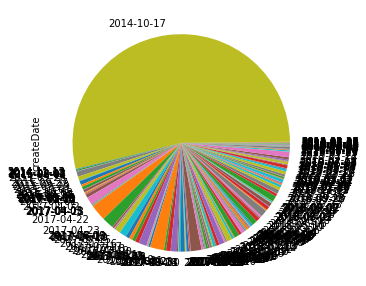

In [67]:
carwashCreatedDate = carwashCreated["createDate"].value_counts().sort_index()
plotcarwashCreateDate = carwashCreatedDate.plot.pie(y='counts', figsize=(5, 5))  
plt.show()

In [139]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [141]:
sns.heatmap(dftot.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

Error in callback <function flush_figures at 0x17f496f70> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#Show empty fields --> no coordinate values 
sns.heatmap(carwashCreated.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')